In [1]:
import sys
sys.version

'3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]'

In [2]:
import matplotlib as mpl
print(mpl.__version__)

import numpy as np
print(np.__version__)

3.8.4
1.26.4


In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rc('axes', unicode_minus=False)
plt.rcParams['axes.unicode_minus'] = False

## csv 파일 확인

In [5]:
import csv

f = open('area.csv', encoding='cp949')
data = csv.reader(f)
 
for row in data :
    print(row)

f.close()

['시도', '시군구', '연령군', '환자수']
['서울', '강남구', '0~9세', '24']
['서울', '강남구', '10~19세', '29']
['서울', '강남구', '20~29세', '39']
['서울', '강남구', '30~39세', '63']
['서울', '강남구', '40~49세', '57']
['서울', '강남구', '50~59세', '43']
['서울', '강남구', '60~69세', '13']
['서울', '강남구', '70~79세', '0']
['서울', '강남구', '80~89세', '0']
['서울', '강남구', '90~99세', '0']
['서울', '강남구', '100세 이상', '0']
['서울', '강남구', '0~9세', '16']
['서울', '강남구', '10~19세', '25']
['서울', '강남구', '20~29세', '157']
['서울', '강남구', '30~39세', '228']
['서울', '강남구', '40~49세', '236']
['서울', '강남구', '50~59세', '114']
['서울', '강남구', '60~69세', '43']
['서울', '강남구', '70~79세', '0']
['서울', '강남구', '80~89세', '0']
['서울', '강남구', '90~99세', '0']
['서울', '강남구', '100세 이상', '0']
['서울', '강동구', '0~9세', '0']
['서울', '강동구', '10~19세', '0']
['서울', '강동구', '20~29세', '22']
['서울', '강동구', '30~39세', '26']
['서울', '강동구', '40~49세', '29']
['서울', '강동구', '50~59세', '14']
['서울', '강동구', '60~69세', '0']
['서울', '강동구', '70~79세', '0']
['서울', '강동구', '80~89세', '0']
['서울', '강동구', '90~99세', '0']
['서울', '강동구', '100세 이상', '

## 지역 (시도별) 에서 연령별로 환자수 그래프

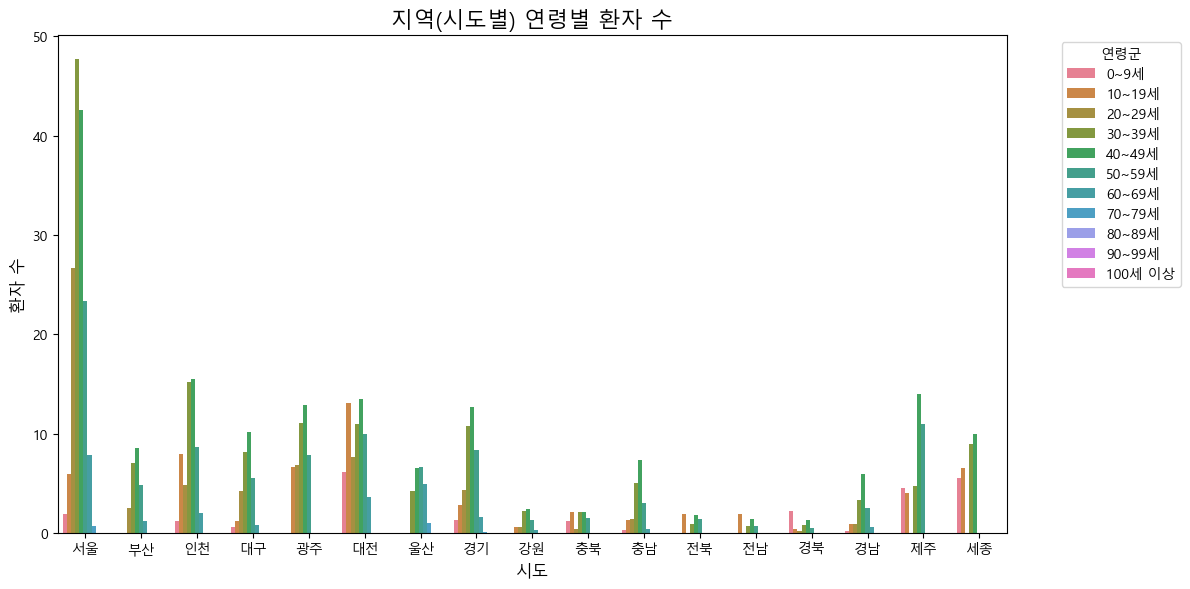

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
file_path = 'area.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

# 그래프 생성
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="시도", y="환자수", hue="연령군", errorbar=None)
plt.title("지역(시도별) 연령별 환자 수", fontsize=16)
plt.xlabel("시도", fontsize=12)
plt.ylabel("환자 수", fontsize=12)
plt.legend(title="연령군", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


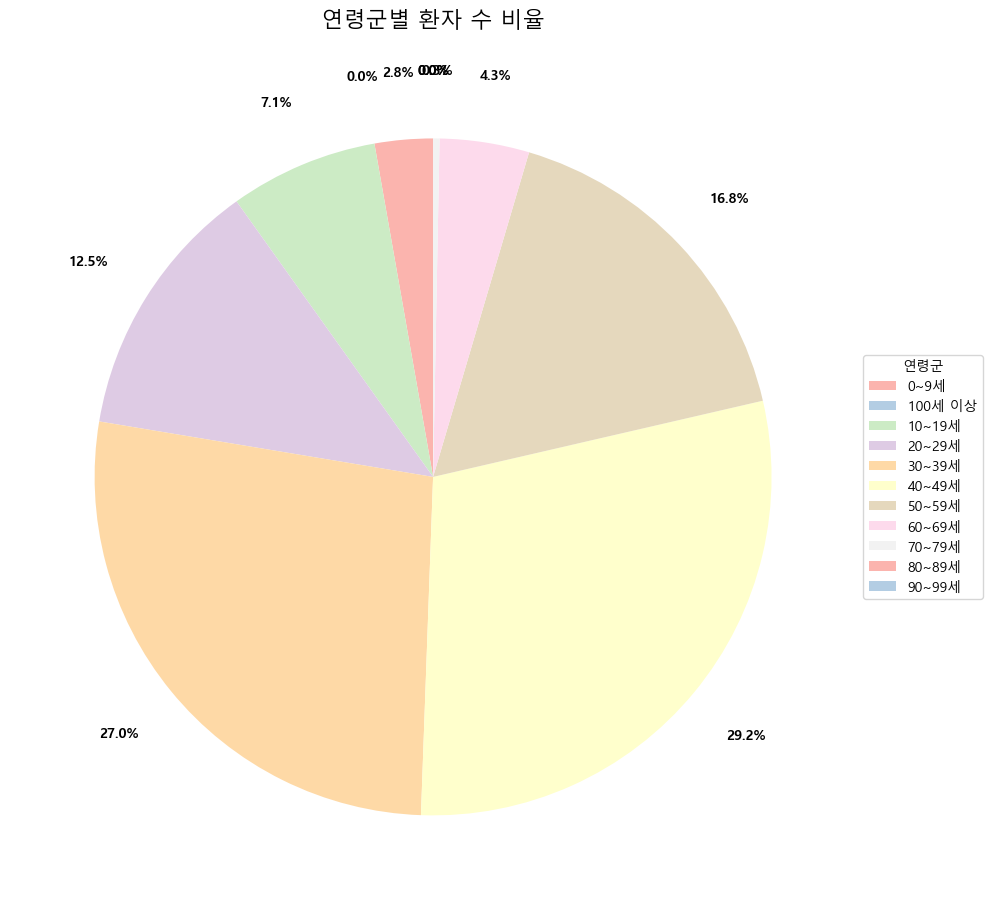

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 로드
file_path = 'area.csv' 
data = pd.read_csv(file_path, encoding='euc-kr')

# 연령군별 환자 수 합계 계산
pie_data = data.groupby("연령군")["환자수"].sum()

# 원형 그래프 생성 (퍼센트를 바깥으로 이동)
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    pie_data, 
    labels=None,  # 라벨을 표시하지 않음
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Pastel1.colors, 
    pctdistance=1.2  # 퍼센트를 바깥으로 이동
)

# 퍼센트 텍스트 스타일 조정
for autotext in autotexts:
    autotext.set_fontsize(10)  # 텍스트 크기
    autotext.set_color("black")  # 텍스트 색상
    autotext.set_weight("bold")  # 텍스트 굵게

# 범례 추가
plt.legend(wedges, pie_data.index, title="연령군", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("연령군별 환자 수 비율", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

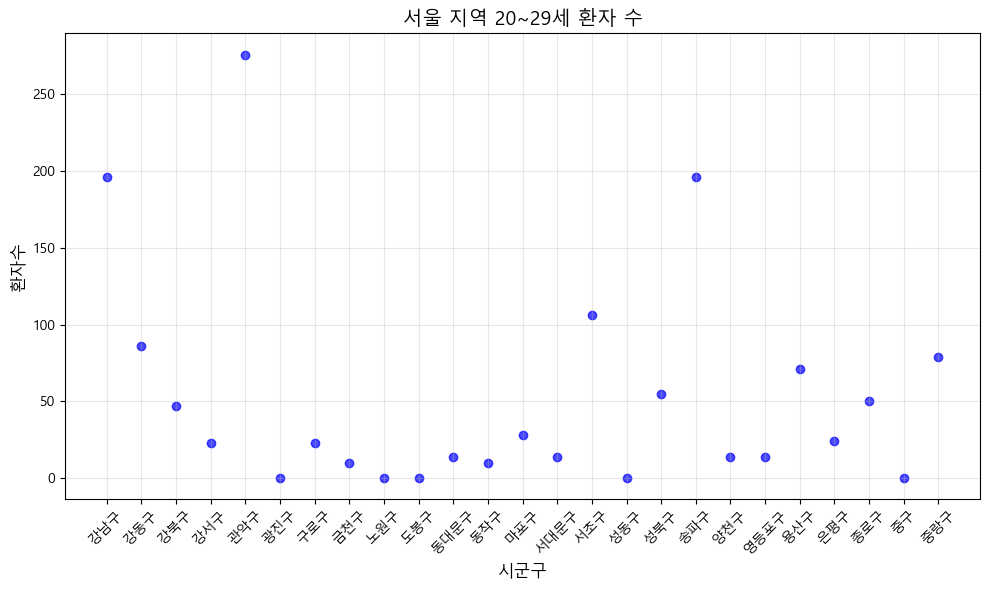

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = 'area.csv' 
data = pd.read_csv(file_path, encoding='euc-kr')

# 사용자 입력으로 지역 및 연령대 선택
selected_region = input("원하는 지역(시도)을 입력하세요: ") 
selected_age_group = input("원하는 연령대(예: 20~29세)를 입력하세요: ") 

# 선택한 지역과 연령대에 해당하는 데이터 필터링
filtered_data = data[(data['시도'] == selected_region) & (data['연령군'] == selected_age_group)]

# 데이터가 있는지 확인
if filtered_data.empty:
    print("선택한 조건에 해당하는 데이터가 없습니다.")
else:
    # 시군구별 환자수를 합산
    aggregated_data = filtered_data.groupby('시군구', as_index=False)['환자수'].sum()

    # 시군구 및 환자수 추출
    districts = aggregated_data['시군구']
    patients = aggregated_data['환자수']

    # 그래프 생성
    plt.figure(figsize=(10, 6))
    plt.scatter(districts, patients, color='blue', alpha=0.7)
    plt.title(f"{selected_region} 지역 {selected_age_group} 환자 수", fontsize=14)
    plt.xlabel("시군구", fontsize=12)
    plt.ylabel("환자수", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # 그래프 출력
    plt.show()



## 지역 (시도별) 에서 지역 (시군구별)에서 연령별로 환자수 그래프

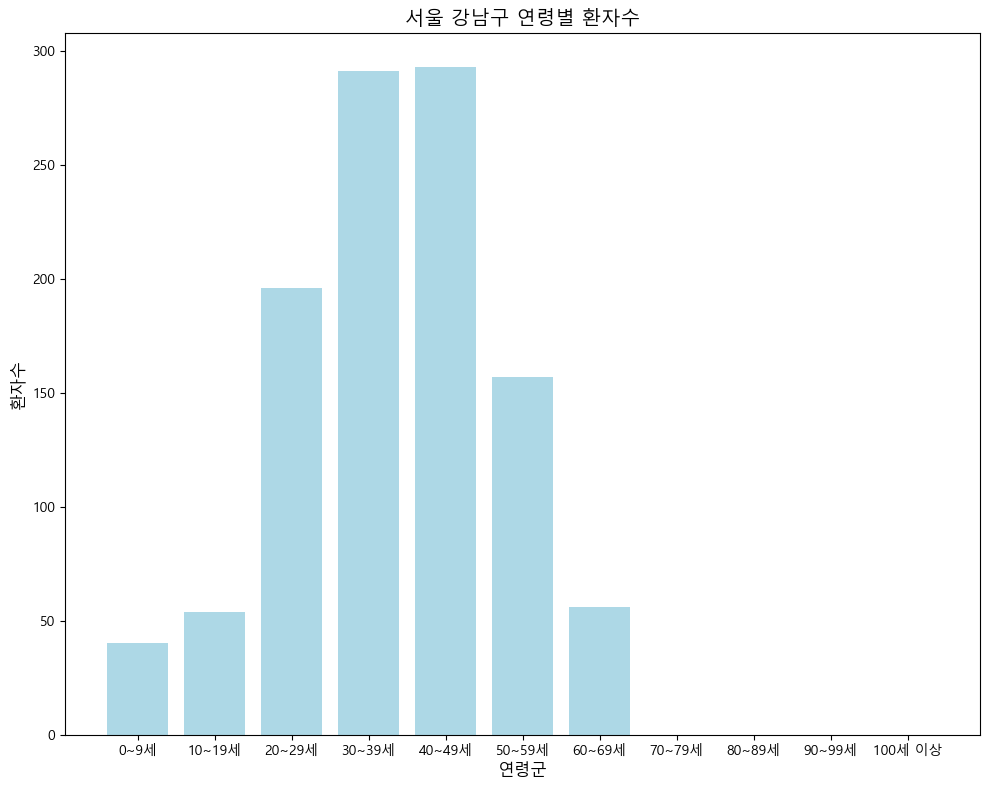

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


# 데이터 불러오기
file_path = 'area.csv' 
data = pd.read_csv(file_path, encoding='euc-kr')

# 사용자 입력으로 시도와 시군구 선택
selected_region = input("원하는 지역(시도)을 입력하세요: ")
selected_district = input(f"{selected_region} 내 원하는 시군구를 입력하세요: ")

# 선택한 지역과 시군구에 해당하는 데이터 필터링
filtered_data = data[(data['시도'] == selected_region) & (data['시군구'] == selected_district)]

# 데이터가 있는지 확인
if filtered_data.empty:
    print("선택한 조건에 해당하는 데이터가 없습니다.")
else:
    # 연령별로 환자수 합산
    age_group_data = filtered_data.groupby('연령군', as_index=False)['환자수'].sum()

    # 연령군 순서대로 정렬: 연령군을 숫자로 변환 후 정렬
    age_group_data['연령군'] = age_group_data['연령군'].replace({
        '0~9세': 0,
        '10~19세': 10,
        '20~29세': 20,
        '30~39세': 30,
        '40~49세': 40,
        '50~59세': 50,
        '60~69세': 60,
        '70~79세': 70,
        '80~89세': 80,
        '90~99세': 90,
        '100세 이상': 100
    })

    age_group_data = age_group_data.sort_values(by='연령군', ascending=True)  # 연령군 기준으로 오름차순 정렬

    # 연령군 및 환자수 추출
    age_groups = age_group_data['연령군'].map({
        0: '0~9세', 10: '10~19세', 20: '20~29세', 30: '30~39세',
        40: '40~49세', 50: '50~59세', 60: '60~69세', 70: '70~79세',
        80: '80~89세', 90: '90~99세', 100: '100세 이상'
    })

    patients = age_group_data['환자수']

    # 막대 그래프 생성
    plt.figure(figsize=(10, 8))
    plt.bar(age_groups, patients, color='lightblue')

    # 제목 및 레이블 추가
    plt.title(f"{selected_region} {selected_district} 연령별 환자수", fontsize=14)
    plt.xlabel('연령군', fontsize=12)
    plt.ylabel('환자수', fontsize=12)

    # 그래프 출력
    plt.tight_layout()
    plt.show()



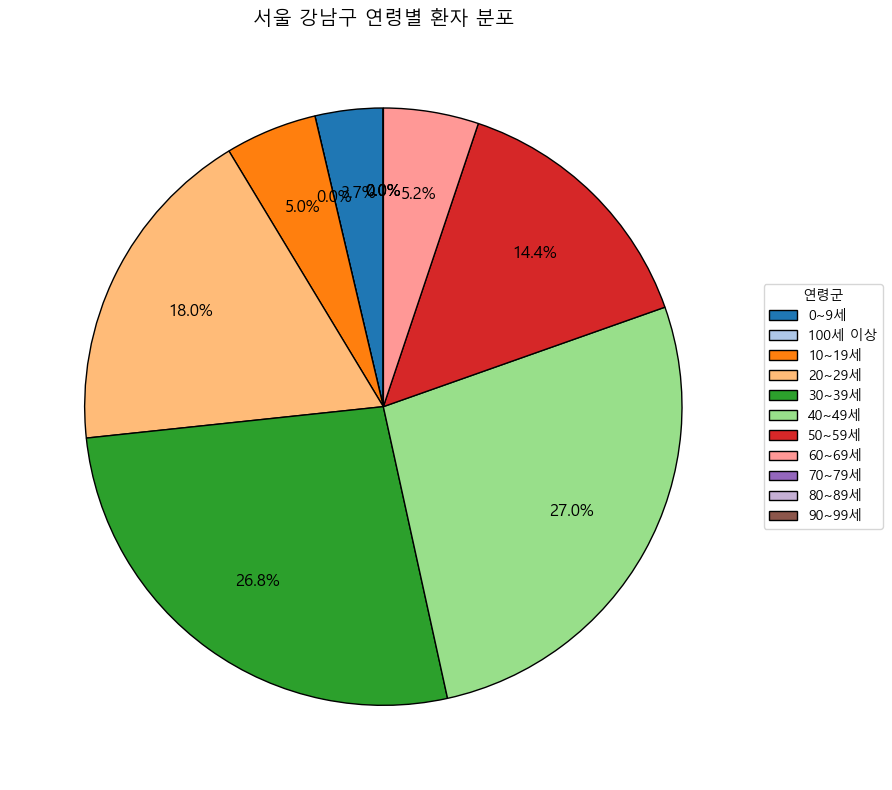

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = 'area.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

# 사용자 입력으로 시도와 시군구 선택
selected_region = input("원하는 지역(시도)을 입력하세요: ")
selected_district = input(f"{selected_region} 내 원하는 시군구를 입력하세요: ") 

# 선택한 지역과 시군구에 해당하는 데이터 필터링
filtered_data = data[(data['시도'] == selected_region) & (data['시군구'] == selected_district)]

# 데이터가 있는지 확인
if filtered_data.empty:
    print("선택한 조건에 해당하는 데이터가 없습니다.")
else:
    # 연령별로 환자수 합산
    age_group_data = filtered_data.groupby('연령군', as_index=False)['환자수'].sum()

    # 연령군 및 환자수 추출
    age_groups = age_group_data['연령군']
    patients = age_group_data['환자수']

    # 원형 그래프 생성
    plt.figure(figsize=(10, 8))

    # 퍼센트를 계산하여 그래프 밖에 표시
    wedges, texts, autotexts = plt.pie(
        patients, 
        labels=None,  # 라벨은 범례로 뺌
        autopct='%1.1f%%',  # 퍼센트 표시
        startangle=90, 
        colors=plt.cm.tab20.colors, 
        wedgeprops={'edgecolor': 'black'}
    )

    # 퍼센트 값을 원형 그래프 밖에 배치하기 위한 위치 조정
    for i, autotext in enumerate(autotexts):
        # 그래프 밖으로 퍼센트 텍스트 이동
        autotext.set_position((1.2 * autotext.get_position()[0], 1.2 * autotext.get_position()[1]))  # 그래프 밖으로 이동
        autotext.set_fontsize(12)  # 폰트 크기 조정

    # 제목 설정
    plt.title(f"{selected_region} {selected_district} 연령별 환자 분포", fontsize=14)

    # 범례 추가
    plt.legend(
        wedges, age_groups, 
        title="연령군", 
        loc="center left", 
        bbox_to_anchor=(1, 0.5)  # 그래프 오른쪽에 범례 배치
    )

    # 그래프 출력
    plt.tight_layout()
    plt.show()


C:\Users\jojeo\AppData\Local\Temp\ipykernel_20808\3998795859.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  age_group_data['연령군'] = age_group_data['연령군'].replace({


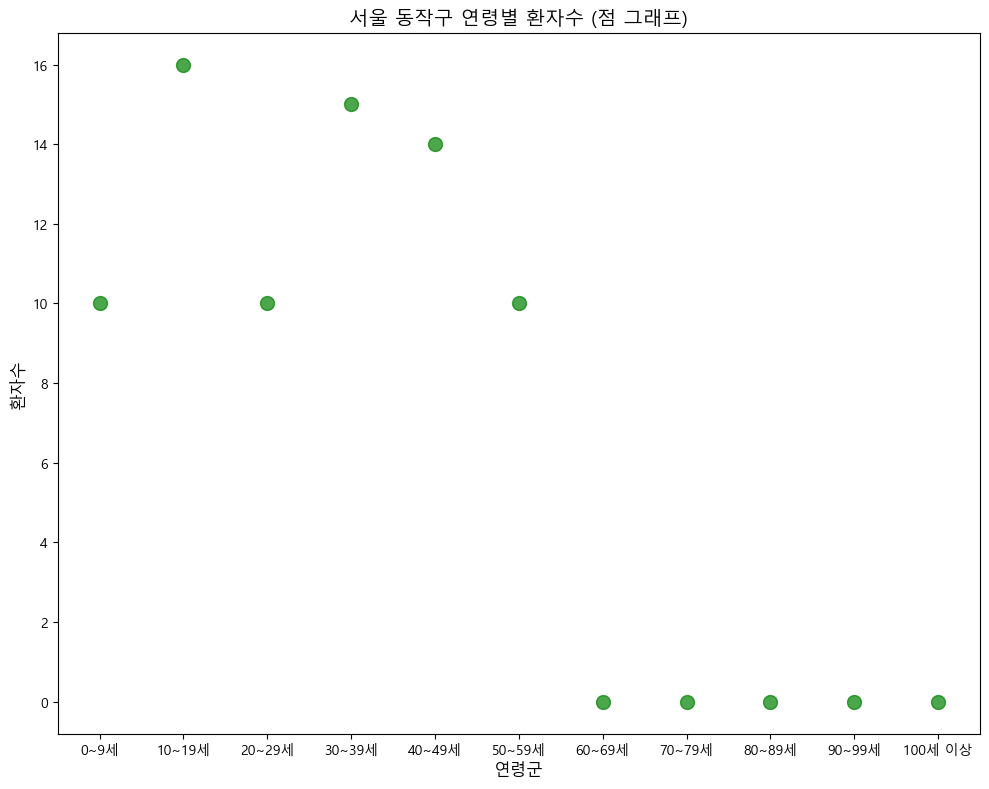

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = 'area.csv' 
data = pd.read_csv(file_path, encoding='euc-kr')

# 사용자 입력으로 시도와 시군구 선택
selected_region = input("원하는 지역(시도)을 입력하세요: ")  
selected_district = input(f"{selected_region} 내 원하는 시군구를 입력하세요: ") 

# 선택한 지역과 시군구에 해당하는 데이터 필터링
filtered_data = data[(data['시도'] == selected_region) & (data['시군구'] == selected_district)]

# 데이터가 있는지 확인
if filtered_data.empty:
    print("선택한 조건에 해당하는 데이터가 없습니다.")
else:
    # 연령별로 환자수 합산
    age_group_data = filtered_data.groupby('연령군', as_index=False)['환자수'].sum()

    # 연령군 순서대로 정렬: 연령군을 숫자로 변환 후 정렬
    age_group_data['연령군'] = age_group_data['연령군'].replace({
        '0~9세': 0,
        '10~19세': 10,
        '20~29세': 20,
        '30~39세': 30,
        '40~49세': 40,
        '50~59세': 50,
        '60~69세': 60,
        '70~79세': 70,
        '80~89세': 80,
        '90~99세': 90,
        '100세 이상': 100
    })

    age_group_data = age_group_data.sort_values(by='연령군', ascending=True)  # 연령군 기준으로 오름차순 정렬

    # 연령군 및 환자수 추출
    age_groups = age_group_data['연령군'].map({
        0: '0~9세', 10: '10~19세', 20: '20~29세', 30: '30~39세',
        40: '40~49세', 50: '50~59세', 60: '60~69세', 70: '70~79세',
        80: '80~89세', 90: '90~99세', 100: '100세 이상'
    })

    patients = age_group_data['환자수']

    # 연령군별 환자수를 점 그래프 (scatter plot)로 시각화
    plt.figure(figsize=(10, 8))
    plt.scatter(age_groups, patients, color='green', s=100, alpha=0.7)

    # 제목 및 레이블 추가
    plt.title(f"{selected_region} {selected_district} 연령별 환자수 (점 그래프)", fontsize=14)
    plt.xlabel('연령군', fontsize=12)
    plt.ylabel('환자수', fontsize=12)

    # 그래프 출력
    plt.tight_layout()
    plt.show()


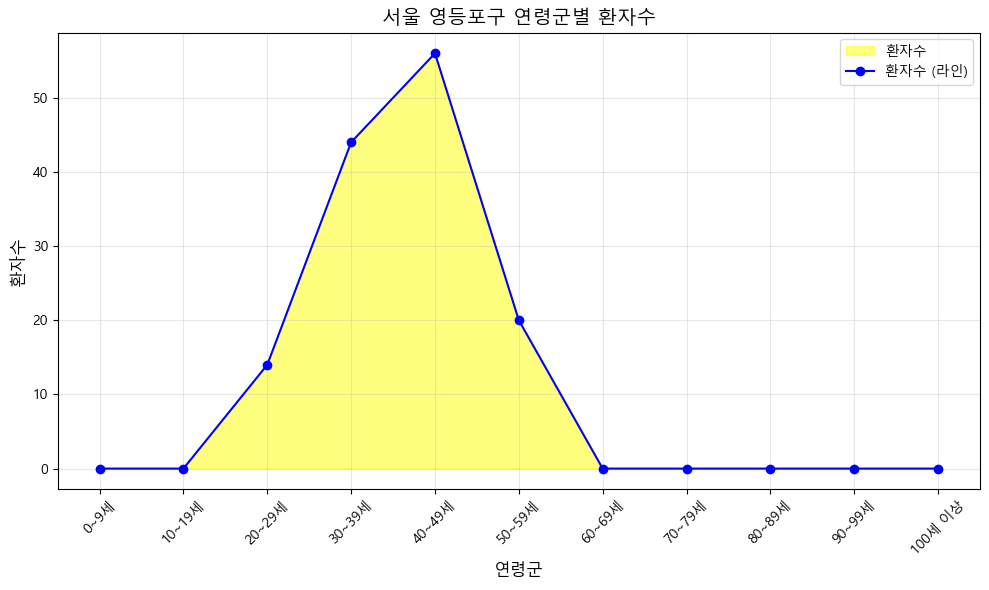

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


# 데이터 불러오기
file_path = 'area.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

# 사용자 입력으로 시도와 시군구 선택
selected_region = input("원하는 지역(시도)을 입력하세요: ")
selected_district = input(f"{selected_region} 내 원하는 시군구를 입력하세요: ")

# 선택한 지역과 시군구에 해당하는 데이터 필터링
filtered_data = data[(data['시도'] == selected_region) & (data['시군구'] == selected_district)]

# 데이터가 있는지 확인
if filtered_data.empty:
    print("선택한 조건에 해당하는 데이터가 없습니다.")
else:
    # 연령별로 환자수 합산
    age_group_data = filtered_data.groupby('연령군', as_index=False)['환자수'].sum()

    # 연령군 순서대로 정렬: 연령군을 숫자로 변환 후 정렬
    age_group_mapping = {
        '0~9세': 0, '10~19세': 10, '20~29세': 20, '30~39세': 30,
        '40~49세': 40, '50~59세': 50, '60~69세': 60, '70~79세': 70,
        '80~89세': 80, '90~99세': 90, '100세 이상': 100
    }
    age_group_data['연령군_숫자'] = age_group_data['연령군'].map(age_group_mapping)
    age_group_data = age_group_data.sort_values(by='연령군_숫자')

    # 연령군 및 환자수 추출
    age_groups = age_group_data['연령군']
    patients = age_group_data['환자수']

    # 연령군별 환자수를 면적 그래프로 시각화
    plt.figure(figsize=(10, 6))
    plt.fill_between(age_groups, patients, color='yellow', alpha=0.5, label='환자수')
    plt.plot(age_groups, patients, color='blue', marker='o', label='환자수 (라인)')

    # 그래프 제목과 레이블
    plt.title(f'{selected_region} {selected_district} 연령군별 환자수', fontsize=14)
    plt.xlabel('연령군', fontsize=12)
    plt.ylabel('환자수', fontsize=12)
    plt.xticks(rotation=45)  # X축 눈금 기울이기
    plt.legend()
    plt.grid(alpha=0.3)

    # 그래프 출력
    plt.tight_layout()  # 그래프 요소 간 여백 자동 조정
    plt.show()


C:\Users\jojeo\AppData\Local\Temp\ipykernel_20808\1124282869.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group_data['연령군_숫자'] = age_group_data['연령군'].map(age_group_mapping)


<Figure size 1000x600 with 0 Axes>

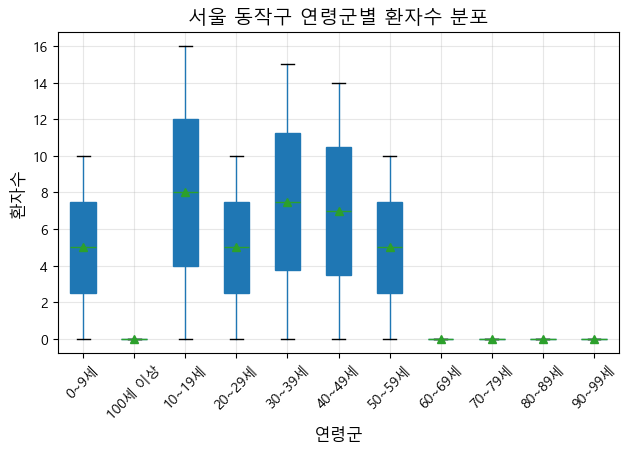

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc


# 데이터 불러오기
file_path = 'area.csv'
data = pd.read_csv(file_path, encoding='euc-kr')

# 사용자 입력으로 시도와 시군구 선택
selected_region = input("원하는 지역(시도)을 입력하세요: ")
selected_district = input(f"{selected_region} 내 원하는 시군구를 입력하세요: ")

# 선택한 지역과 시군구에 해당하는 데이터 필터링
filtered_data = data[(data['시도'] == selected_region) & (data['시군구'] == selected_district)]

# 데이터가 있는지 확인
if filtered_data.empty:
    print("선택한 조건에 해당하는 데이터가 없습니다.")
else:
    # 연령별로 환자수 데이터 준비
    age_group_data = filtered_data[['연령군', '환자수']]

    # 연령군 순서 정렬
    age_group_mapping = {
        '0~9세': 0, '10~19세': 10, '20~29세': 20, '30~39세': 30,
        '40~49세': 40, '50~59세': 50, '60~69세': 60, '70~79세': 70,
        '80~89세': 80, '90~99세': 90, '100세 이상': 100
    }
    age_group_data['연령군_숫자'] = age_group_data['연령군'].map(age_group_mapping)
    age_group_data = age_group_data.sort_values(by='연령군_숫자')

    # 박스플롯 시각화
    plt.figure(figsize=(10, 6))
    age_group_data.boxplot(column='환자수', by='연령군', grid=False, patch_artist=True, showmeans=True)

    # 그래프 제목과 레이블
    plt.title(f'{selected_region} {selected_district} 연령군별 환자수 분포', fontsize=14)
    plt.suptitle("")  # 기본으로 생성되는 상단 제목 제거
    plt.xlabel('연령군', fontsize=12)
    plt.ylabel('환자수', fontsize=12)
    plt.xticks(rotation=45)  # X축 눈금 기울이기
    plt.grid(alpha=0.3)

    # 그래프 출력
    plt.tight_layout()
    plt.show()
